In [1]:
shape_cat=""
vol=""
z_range=""

In [2]:
# Parameters
shape_cat = "im3"
vol = "all"
z_range = "high_z"


In [3]:
#This header file contains all the common packages
%matplotlib inline
%run /home/cz136/project/sa/lib/src/header.py $shape_cat $vol $z_range 
%run -i /home/cz136/project/sa/lib/src/func.py  

In [4]:
sep="------------------------------------------------------------------------------"
np.set_printoptions(precision=4)

In [5]:
NBINS=10

In [6]:
import treecorr
import astropy.cosmology
from fastprogress import master_bar, progress_bar
from ipywidgets import FloatProgress
from IPython.display import display
from tqdm import tqdm

In [7]:
assert np.isin(shapes['All','MEM_MATCH_ID'].to_numpy(),clusters.index.to_numpy()).all()==True

In [8]:
def get_ng(cluster,mode1,mode2):
    if mode2=="abs":
        UPPER_BOUND=np.max(shapes[('All','R')])
        distance=('All','angR')
        
    elif mode2=="rel":
        UPPER_BOUND=1.2
        distance=('All','normLR')
    else:
        raise

    if mode1 == "s":
        def get_cluster_cen(cluster):
            return (get_unique_center_for_cluster(cluster))
        def get_cluster_sats(cluster):
            cen_mat_id=cluster.name
            cen_id=cluster[('Alt','Alt1','ID_CENT')]
            sats=shapes[shapes['All','MEM_MATCH_ID']==cen_mat_id]
            sats=sats[sats.index!=cen_id]
            return (sats)
    elif mode1=='r':
        def get_cluster_sats(cluster):
            return(shapes)
        def get_cluster_cen(cluster):
            return (random)

    else:
        raise


    cen=get_cluster_cen(cluster)
    sats=get_cluster_sats(cluster)


    sats_e1=sats[('All','e1')].to_numpy()
    sats_e2=sats[('All','e2')].to_numpy()
    sats_angr=sats[distance]

#     print(sats_e1,sats_e2)

    if type(cen[('All','RA')])==np.float64:
        cen_angr=np.array(cen[distance]).reshape(1)
        cen_ra=np.array(cen[('All','RA')]).reshape(1)
        cen_dec=np.array(cen[('All','DEC')]).reshape(1)
    else:
#         cen_e1=cen[('All','e1')].to_numpy
#         cen_e2=cen[('All','e2')].to_numpy()
        cen_angr=cen[distance].to_numpy()
        cen_ra=cen[('All','RA')].to_numpy()
        cen_dec=cen[('All','DEC')].to_numpy()




#     print(cen_e1,cen_e2)

    sats_ra=sats[('All','RA')].to_numpy()
    sats_dec=sats[('All','DEC')].to_numpy()




#     print(np.shape(cen_ra),np.shape(cen_dec))    
#     print(cen_ra,cen_dec)    

    sats_cat = treecorr.Catalog( g1 = sats_e1, g2   = sats_e2, 
                                 ra = sats_ra, dec = sats_dec,r=sats_angr,
                                 ra_units='deg', dec_units='deg')

    cen_cat = treecorr.Catalog( 
                                 ra = cen_ra, dec = cen_dec, r=cen_angr,
                                 ra_units='deg', dec_units='deg')

    ng = treecorr.NGCorrelation(nbins=NBINS, min_sep=0.01, max_sep=UPPER_BOUND, bin_slop=0.0,
                               metric="Rperp")
    ng.process_cross(cen_cat,sats_cat)

    return(ng)

In [9]:
def get_xi_meanlogr_varxi_npairs(cluster,mode1,mode2):
    ng=get_ng(cluster,mode1,mode2)
    return(np.array([ng.xi,ng.meanlogr,ng.varxi,ng.npairs]))

In [10]:
length=len(clusters)

def get_ng_list(mode2):
    ng_list=np.empty([length,4,NBINS])
    filler=np.zeros([1,4,NBINS])

    i=0
    e_count=0
    for index,cluster in tqdm(clusters.iterrows()):
        try:
            ng_list[i,:,:]=get_xi_meanlogr_varxi_npairs(cluster,'s',mode2)
            i=i+1
        except ValueError as e:
            ng_list[i,:,:]=filler
            i=i+1
            e_count=e_count+1
    print("Number of empty sat catalogs is {}".format(e_count))
    return (ng_list)

In [11]:
ng_abs=get_ng_list('abs')
ng_rel=get_ng_list('rel')

0it [00:00, ?it/s]

14it [00:00, 133.79it/s]

30it [00:00, 139.17it/s]

46it [00:00, 142.88it/s]

59it [00:00, 138.20it/s]

75it [00:00, 141.96it/s]

90it [00:00, 143.51it/s]

104it [00:00, 139.86it/s]

120it [00:00, 143.25it/s]

135it [00:00, 143.39it/s]

151it [00:01, 145.71it/s]

167it [00:01, 147.94it/s]

182it [00:01, 147.25it/s]

197it [00:01, 124.15it/s]

210it [00:01, 113.40it/s]

223it [00:01, 117.86it/s]

236it [00:01, 111.46it/s]

248it [00:01, 111.58it/s]

260it [00:02, 109.76it/s]

276it [00:02, 120.07it/s]

292it [00:02, 128.87it/s]

307it [00:02, 134.31it/s]

321it [00:02, 120.43it/s]

337it [00:02, 128.97it/s]

353it [00:02, 135.76it/s]

369it [00:02, 141.11it/s]

384it [00:02, 130.64it/s]

400it [00:03, 136.85it/s]

415it [00:03, 140.34it/s]

431it [00:03, 143.11it/s]

446it [00:03, 126.08it/s]

460it [00:03, 127.44it/s]

475it [00:03, 133.22it/s]

489it [00:03, 125.35it/s]

505it [00:03, 133.33it/s]

521it [00:03, 135.52it/s]

535it [00:04, 122.59it/s]

548it [00:04, 117.40it/s]

564it [00:04, 126.92it/s]

578it [00:04, 114.57it/s]

591it [00:04, 109.55it/s]

603it [00:04, 104.09it/s]

614it [00:04, 101.79it/s]

625it [00:04, 100.26it/s]

636it [00:05, 98.95it/s] 

651it [00:05, 109.42it/s]

667it [00:05, 119.46it/s]

683it [00:05, 128.49it/s]

697it [00:05, 130.51it/s]

712it [00:05, 134.84it/s]

728it [00:05, 139.27it/s]

743it [00:05, 133.98it/s]

758it [00:05, 136.57it/s]

773it [00:05, 139.64it/s]

788it [00:06, 141.19it/s]

804it [00:06, 144.49it/s]

820it [00:06, 147.20it/s]

835it [00:06, 142.76it/s]

850it [00:06, 143.97it/s]

865it [00:06, 145.02it/s]

880it [00:06, 144.10it/s]

895it [00:06, 144.76it/s]

910it [00:06, 140.58it/s]

926it [00:07, 144.01it/s]

941it [00:07, 145.28it/s]

957it [00:07, 147.84it/s]

972it [00:07, 125.57it/s]

986it [00:07, 115.69it/s]

999it [00:07, 115.38it/s]

1015it [00:07, 124.93it/s]

1031it [00:07, 132.39it/s]

1045it [00:07, 131.47it/s]

1061it [00:08, 137.35it/s]

1076it [00:08, 136.87it/s]

1090it [00:08, 137.66it/s]

1105it [00:08, 138.17it/s]

1119it [00:08, 135.71it/s]

1133it [00:08, 135.22it/s]

1150it [00:08, 141.88it/s]

1166it [00:08, 146.54it/s]

1182it [00:08, 149.02it/s]

1198it [00:09, 151.08it/s]

1214it [00:09, 152.76it/s]

1230it [00:09, 153.77it/s]

1246it [00:09, 152.94it/s]

1262it [00:09, 152.88it/s]

1278it [00:09, 123.85it/s]

1292it [00:09, 120.75it/s]

1306it [00:09, 123.94it/s]

1321it [00:09, 129.33it/s]

1335it [00:10, 117.43it/s]

1351it [00:10, 126.37it/s]

1367it [00:10, 133.75it/s]

1383it [00:10, 138.92it/s]

1400it [00:10, 144.79it/s]

1415it [00:10, 142.66it/s]

1431it [00:10, 146.20it/s]

1446it [00:10, 142.26it/s]

1462it [00:10, 145.46it/s]

1478it [00:11, 147.84it/s]

1494it [00:11, 149.18it/s]

1509it [00:11, 143.06it/s]

1524it [00:11, 144.23it/s]

1539it [00:11, 145.42it/s]

1554it [00:11, 141.34it/s]

1569it [00:11, 142.41it/s]

1584it [00:11, 123.82it/s]

1597it [00:11, 123.04it/s]

1613it [00:12, 130.21it/s]

1629it [00:12, 136.25it/s]

1645it [00:12, 140.69it/s]

1661it [00:12, 144.61it/s]

1676it [00:12, 144.47it/s]

1692it [00:12, 146.61it/s]

1708it [00:12, 148.24it/s]

1723it [00:12, 145.94it/s]

1738it [00:12, 129.05it/s]

1753it [00:13, 133.23it/s]

1768it [00:13, 136.23it/s]

1783it [00:13, 138.27it/s]

1798it [00:13, 140.09it/s]

1814it [00:13, 144.27it/s]

1829it [00:13, 123.43it/s]

1844it [00:13, 130.08it/s]

1859it [00:13, 134.90it/s]

1875it [00:13, 140.07it/s]

1891it [00:14, 143.31it/s]

1906it [00:14, 144.03it/s]

1922it [00:14, 145.90it/s]

1937it [00:14, 141.24it/s]

1953it [00:14, 145.05it/s]

1969it [00:14, 147.37it/s]

1984it [00:14, 134.93it/s]

2000it [00:14, 140.19it/s]

2016it [00:14, 144.42it/s]

2031it [00:15, 144.80it/s]

2046it [00:15, 124.61it/s]

2060it [00:15, 115.26it/s]

2076it [00:15, 124.78it/s]

2092it [00:15, 132.45it/s]

2107it [00:15, 137.21it/s]

2123it [00:15, 141.92it/s]

2138it [00:15, 135.74it/s]

2155it [00:15, 142.60it/s]

2170it [00:16, 134.69it/s]

2184it [00:16, 135.68it/s]

2199it [00:16, 137.81it/s]

2215it [00:16, 142.17it/s]

2231it [00:16, 144.85it/s]

2246it [00:16, 139.11it/s]

2261it [00:16, 137.03it/s]

2275it [00:16, 119.13it/s]

2289it [00:16, 123.91it/s]

2304it [00:17, 130.65it/s]

2320it [00:17, 137.81it/s]

2336it [00:17, 142.29it/s]

2351it [00:17, 143.33it/s]

2366it [00:17, 143.70it/s]

2382it [00:17, 146.51it/s]

2398it [00:17, 147.82it/s]

2413it [00:17, 147.85it/s]

2429it [00:17, 149.05it/s]

2445it [00:18, 150.39it/s]

2461it [00:18, 149.60it/s]

2477it [00:18, 150.10it/s]

2493it [00:18, 129.93it/s]

2507it [00:18, 122.18it/s]

2523it [00:18, 130.22it/s]

2538it [00:18, 135.40it/s]

2552it [00:18, 120.00it/s]

2565it [00:18, 115.01it/s]

2581it [00:19, 124.52it/s]

2597it [00:19, 131.97it/s]

2613it [00:19, 138.80it/s]

2629it [00:19, 143.92it/s]

2644it [00:19, 145.68it/s]

2660it [00:19, 148.94it/s]

2676it [00:19, 150.28it/s]

2692it [00:19, 150.54it/s]

2708it [00:19, 149.63it/s]

2724it [00:20, 151.00it/s]

2740it [00:20, 152.36it/s]

2756it [00:20, 149.78it/s]

2772it [00:20, 150.38it/s]

2788it [00:20, 128.27it/s]

2804it [00:20, 135.45it/s]

2820it [00:20, 140.74it/s]

2835it [00:20, 139.93it/s]

2851it [00:20, 144.86it/s]

2867it [00:21, 146.94it/s]

2882it [00:21, 127.12it/s]

2896it [00:21, 116.86it/s]

2909it [00:21, 107.96it/s]

2924it [00:21, 116.19it/s]

2940it [00:21, 125.96it/s]

2956it [00:21, 133.46it/s]

2972it [00:21, 138.57it/s]

2988it [00:22, 143.58it/s]

3003it [00:22, 143.49it/s]

3019it [00:22, 147.50it/s]

3035it [00:22, 148.70it/s]

3051it [00:22, 149.84it/s]

3068it [00:22, 152.45it/s]

3084it [00:22, 153.76it/s]

3100it [00:22, 149.04it/s]

3116it [00:22, 150.79it/s]

3132it [00:22, 151.32it/s]

3148it [00:23, 153.08it/s]

3164it [00:23, 145.93it/s]

3179it [00:23, 146.97it/s]

3194it [00:23, 147.09it/s]

3210it [00:23, 148.43it/s]

3226it [00:23, 150.71it/s]

3242it [00:23, 151.28it/s]

3258it [00:23, 149.64it/s]

3274it [00:23, 151.65it/s]

3291it [00:24, 154.20it/s]

3307it [00:24, 153.48it/s]

3324it [00:24, 155.31it/s]

3340it [00:24, 155.52it/s]

3356it [00:24, 156.61it/s]

3372it [00:24, 154.71it/s]

3388it [00:24, 154.40it/s]

3404it [00:24, 153.33it/s]

3420it [00:24, 151.28it/s]

3436it [00:24, 152.48it/s]

3452it [00:25, 154.57it/s]

3468it [00:25, 155.16it/s]

3484it [00:25, 154.70it/s]

3500it [00:25, 155.06it/s]

3516it [00:25, 143.37it/s]

3532it [00:25, 146.27it/s]

3549it [00:25, 150.68it/s]

3565it [00:25, 151.60it/s]

3581it [00:25, 149.26it/s]

3597it [00:26, 151.78it/s]

3613it [00:26, 145.50it/s]

3629it [00:26, 147.91it/s]

3645it [00:26, 149.84it/s]

3661it [00:26, 150.24it/s]

3677it [00:26, 152.06it/s]

3693it [00:26, 145.25it/s]

3709it [00:26, 148.48it/s]

3724it [00:26, 144.76it/s]

3739it [00:26, 145.72it/s]

3755it [00:27, 148.82it/s]

3771it [00:27, 149.89it/s]

3787it [00:27, 152.41it/s]

3803it [00:27, 148.68it/s]

3818it [00:27, 147.44it/s]

3833it [00:27, 129.19it/s]

3847it [00:27, 119.14it/s]

3861it [00:27, 123.16it/s]

3876it [00:28, 129.86it/s]

3892it [00:28, 137.51it/s]

3908it [00:28, 142.49it/s]

3924it [00:28, 147.03it/s]

3940it [00:28, 149.26it/s]

3956it [00:28, 142.44it/s]

3972it [00:28, 144.94it/s]

3988it [00:28, 148.43it/s]

4004it [00:28, 148.82it/s]

4020it [00:28, 150.61it/s]

4036it [00:29, 125.21it/s]

4050it [00:29, 123.20it/s]

4065it [00:29, 128.07it/s]

4080it [00:29, 132.68it/s]

4094it [00:29, 117.43it/s]

4107it [00:29, 118.26it/s]

4123it [00:29, 127.64it/s]

4139it [00:29, 134.49it/s]

4153it [00:30, 131.94it/s]

4167it [00:30, 123.27it/s]

4182it [00:30, 129.35it/s]

4196it [00:30, 117.43it/s]

4212it [00:30, 126.36it/s]

4228it [00:30, 134.18it/s]

4245it [00:30, 141.01it/s]

4261it [00:30, 144.03it/s]

4276it [00:30, 139.86it/s]

4292it [00:31, 144.16it/s]

4309it [00:31, 148.98it/s]

4325it [00:31, 150.08it/s]

4342it [00:31, 154.63it/s]

4358it [00:31, 153.96it/s]

4374it [00:31, 153.37it/s]

4390it [00:31, 154.89it/s]

4406it [00:31, 131.93it/s]

4422it [00:31, 138.04it/s]

4438it [00:32, 142.54it/s]

4454it [00:32, 145.22it/s]

4470it [00:32, 148.51it/s]

4486it [00:32, 149.17it/s]

4502it [00:32, 142.23it/s]

4518it [00:32, 145.59it/s]

4534it [00:32, 148.81it/s]

4551it [00:32, 152.10it/s]

4567it [00:32, 141.25it/s]

4582it [00:33, 131.32it/s]

4599it [00:33, 139.49it/s]

4615it [00:33, 144.61it/s]

4632it [00:33, 149.57it/s]

4649it [00:33, 153.91it/s]

4666it [00:33, 155.64it/s]

4683it [00:33, 157.55it/s]

4700it [00:33, 158.41it/s]

4717it [00:33, 159.87it/s]

4734it [00:33, 160.64it/s]

4736it [00:34, 139.22it/s]


0it [00:00, ?it/s]

9it [00:00, 86.93it/s]

Number of empty sat catalogs is 175


23it [00:00, 97.29it/s]

38it [00:00, 108.36it/s]

54it [00:00, 119.45it/s]

70it [00:00, 129.17it/s]

86it [00:00, 136.44it/s]

103it [00:00, 143.18it/s]

120it [00:00, 147.73it/s]

135it [00:00, 129.50it/s]

149it [00:01, 132.40it/s]

165it [00:01, 138.47it/s]

181it [00:01, 144.10it/s]

198it [00:01, 147.91it/s]

214it [00:01, 149.78it/s]

230it [00:01, 146.46it/s]

245it [00:01, 147.14it/s]

262it [00:01, 150.98it/s]

278it [00:01, 149.42it/s]

294it [00:02, 147.93it/s]

311it [00:02, 150.94it/s]

328it [00:02, 154.30it/s]

344it [00:02, 123.36it/s]

358it [00:02, 115.04it/s]

371it [00:02, 111.17it/s]

383it [00:02, 108.32it/s]

400it [00:02, 120.13it/s]

416it [00:03, 127.77it/s]

433it [00:03, 136.79it/s]

450it [00:03, 143.62it/s]

466it [00:03, 147.27it/s]

482it [00:03, 150.32it/s]

499it [00:03, 153.84it/s]

515it [00:03, 112.92it/s]

532it [00:03, 124.47it/s]

548it [00:03, 133.30it/s]

564it [00:04, 140.29it/s]

581it [00:04, 146.46it/s]

598it [00:04, 150.52it/s]

615it [00:04, 153.68it/s]

631it [00:04, 155.12it/s]

647it [00:04, 142.62it/s]

664it [00:04, 147.98it/s]

681it [00:04, 151.99it/s]

698it [00:04, 154.70it/s]

714it [00:05, 156.10it/s]

730it [00:05, 147.77it/s]

745it [00:05, 147.75it/s]

760it [00:05, 148.32it/s]

775it [00:05, 148.53it/s]

791it [00:05, 149.99it/s]

807it [00:05, 150.63it/s]

823it [00:05, 149.90it/s]

839it [00:05, 152.19it/s]

855it [00:06, 148.96it/s]

870it [00:06, 149.02it/s]

885it [00:06, 147.12it/s]

900it [00:06, 147.29it/s]

916it [00:06, 150.31it/s]

933it [00:06, 153.79it/s]

950it [00:06, 156.27it/s]

966it [00:06, 130.10it/s]

980it [00:06, 118.14it/s]

993it [00:07, 119.09it/s]

1010it [00:07, 129.79it/s]

1024it [00:07, 121.67it/s]

1039it [00:07, 128.63it/s]

1055it [00:07, 134.91it/s]

1071it [00:07, 139.95it/s]

1086it [00:07, 124.69it/s]

1100it [00:07, 115.65it/s]

1113it [00:08, 111.85it/s]

1128it [00:08, 119.54it/s]

1141it [00:08, 109.34it/s]

1153it [00:08, 105.27it/s]

1164it [00:08, 104.56it/s]

1179it [00:08, 114.43it/s]

1195it [00:08, 123.22it/s]

1210it [00:08, 130.07it/s]

1224it [00:08, 130.81it/s]

1238it [00:09, 119.46it/s]

1251it [00:09, 119.72it/s]

1267it [00:09, 129.25it/s]

1283it [00:09, 135.47it/s]

1300it [00:09, 143.58it/s]

1317it [00:09, 149.59it/s]

1333it [00:09, 151.06it/s]

1349it [00:09, 152.52it/s]

1366it [00:09, 155.08it/s]

1382it [00:09, 156.22it/s]

1398it [00:10, 157.17it/s]

1415it [00:10, 157.81it/s]

1431it [00:10, 136.90it/s]

1447it [00:10, 142.45it/s]

1462it [00:10, 142.24it/s]

1477it [00:10, 125.50it/s]

1492it [00:10, 130.15it/s]

1509it [00:10, 137.77it/s]

1524it [00:11, 124.44it/s]

1537it [00:11, 121.03it/s]

1553it [00:11, 129.77it/s]

1570it [00:11, 137.51it/s]

1586it [00:11, 142.58it/s]

1602it [00:11, 147.08it/s]

1619it [00:11, 151.50it/s]

1636it [00:11, 155.51it/s]

1652it [00:11, 155.94it/s]

1668it [00:12, 126.67it/s]

1684it [00:12, 133.44it/s]

1701it [00:12, 141.01it/s]

1716it [00:12, 142.81it/s]

1731it [00:12, 131.00it/s]

1747it [00:12, 136.53it/s]

1764it [00:12, 143.38it/s]

1781it [00:12, 149.30it/s]

1797it [00:12, 142.28it/s]

1814it [00:13, 148.21it/s]

1831it [00:13, 152.39it/s]

1847it [00:13, 151.02it/s]

1863it [00:13, 144.68it/s]

1880it [00:13, 150.64it/s]

1896it [00:13, 152.75it/s]

1912it [00:13, 147.15it/s]

1928it [00:13, 149.12it/s]

1944it [00:13, 151.62it/s]

1961it [00:14, 155.38it/s]

1977it [00:14, 156.08it/s]

1994it [00:14, 157.75it/s]

2011it [00:14, 159.05it/s]

2028it [00:14, 159.62it/s]

2044it [00:14, 157.77it/s]

2061it [00:14, 160.34it/s]

2078it [00:14, 162.48it/s]

2095it [00:14, 163.80it/s]

2112it [00:14, 165.20it/s]

2129it [00:15, 166.02it/s]

2146it [00:15, 151.95it/s]

2162it [00:15, 133.50it/s]

2176it [00:15, 134.95it/s]

2193it [00:15, 142.27it/s]

2210it [00:15, 148.31it/s]

2227it [00:15, 154.06it/s]

2244it [00:15, 158.03it/s]

2261it [00:15, 160.71it/s]

2278it [00:16, 162.22it/s]

2295it [00:16, 163.32it/s]

2312it [00:16, 164.22it/s]

2329it [00:16, 149.76it/s]

2345it [00:16, 138.29it/s]

2362it [00:16, 145.79it/s]

2379it [00:16, 150.82it/s]

2396it [00:16, 155.23it/s]

2413it [00:16, 158.87it/s]

2430it [00:17, 156.47it/s]

2446it [00:17, 157.31it/s]

2463it [00:17, 159.50it/s]

2480it [00:17, 160.54it/s]

2497it [00:17, 162.89it/s]

2514it [00:17, 163.11it/s]

2531it [00:17, 160.84it/s]

2548it [00:17, 161.66it/s]

2565it [00:17, 161.97it/s]

2582it [00:18, 131.69it/s]

2597it [00:18, 119.89it/s]

2611it [00:18, 125.20it/s]

2627it [00:18, 133.40it/s]

2644it [00:18, 140.91it/s]

2660it [00:18, 145.58it/s]

2677it [00:18, 150.90it/s]

2694it [00:18, 154.97it/s]

2711it [00:18, 157.22it/s]

2728it [00:19, 159.29it/s]

2745it [00:19, 161.25it/s]

2762it [00:19, 161.16it/s]

2779it [00:19, 133.33it/s]

2794it [00:19, 131.73it/s]

2810it [00:19, 138.64it/s]

2826it [00:19, 144.07it/s]

2842it [00:19, 147.38it/s]

2858it [00:20, 124.78it/s]

2873it [00:20, 131.15it/s]

2889it [00:20, 137.35it/s]

2905it [00:20, 142.93it/s]

2920it [00:20, 141.26it/s]

2937it [00:20, 146.81it/s]

2954it [00:20, 151.27it/s]

2971it [00:20, 154.67it/s]

2988it [00:20, 156.92it/s]

3005it [00:20, 158.89it/s]

3022it [00:21, 159.91it/s]

3039it [00:21, 129.78it/s]

3056it [00:21, 137.11it/s]

3071it [00:21, 119.81it/s]

3088it [00:21, 130.14it/s]

3105it [00:21, 139.22it/s]

3122it [00:21, 145.22it/s]

3139it [00:21, 149.81it/s]

3155it [00:22, 138.02it/s]

3170it [00:22, 131.46it/s]

3187it [00:22, 140.09it/s]

3203it [00:22, 145.42it/s]

3220it [00:22, 151.00it/s]

3236it [00:22, 152.76it/s]

3253it [00:22, 157.49it/s]

3270it [00:22, 159.64it/s]

3287it [00:22, 161.11it/s]

3304it [00:23, 161.15it/s]

3321it [00:23, 160.51it/s]

3338it [00:23, 138.75it/s]

3353it [00:23, 127.22it/s]

3369it [00:23, 135.00it/s]

3384it [00:23, 133.89it/s]

3400it [00:23, 140.48it/s]

3417it [00:23, 146.54it/s]

3432it [00:23, 135.72it/s]

3446it [00:24, 128.59it/s]

3461it [00:24, 132.65it/s]

3479it [00:24, 141.88it/s]

3496it [00:24, 147.93it/s]

3514it [00:24, 153.81it/s]

3530it [00:24, 154.07it/s]

3547it [00:24, 158.05it/s]

3564it [00:24, 159.87it/s]

3581it [00:24, 144.62it/s]

3598it [00:25, 149.50it/s]

3616it [00:25, 155.05it/s]

3633it [00:25, 157.05it/s]

3649it [00:25, 157.52it/s]

3665it [00:25, 138.20it/s]

3682it [00:25, 145.12it/s]

3697it [00:25, 143.81it/s]

3714it [00:25, 150.24it/s]

3731it [00:25, 154.44it/s]

3748it [00:26, 157.88it/s]

3765it [00:26, 158.70it/s]

3783it [00:26, 161.99it/s]

3800it [00:26, 163.33it/s]

3817it [00:26, 156.58it/s]

3834it [00:26, 158.40it/s]

3850it [00:26, 142.50it/s]

3867it [00:26, 149.71it/s]

3883it [00:26, 152.31it/s]

3900it [00:27, 156.13it/s]

3916it [00:27, 153.50it/s]

3933it [00:27, 157.14it/s]

3949it [00:27, 153.51it/s]

3967it [00:27, 158.85it/s]

3984it [00:27, 162.00it/s]

4001it [00:27, 159.65it/s]

4018it [00:27, 149.41it/s]

4034it [00:27, 152.34it/s]

4050it [00:28, 151.92it/s]

4066it [00:28, 136.59it/s]

4082it [00:28, 141.14it/s]

4099it [00:28, 147.33it/s]

4115it [00:28, 150.86it/s]

4132it [00:28, 155.00it/s]

4149it [00:28, 157.67it/s]

4167it [00:28, 163.42it/s]

4184it [00:28, 162.39it/s]

4201it [00:28, 162.82it/s]

4218it [00:29, 164.29it/s]

4235it [00:29, 165.72it/s]

4253it [00:29, 167.22it/s]

4270it [00:29, 164.96it/s]

4287it [00:29, 133.18it/s]

4303it [00:29, 139.28it/s]

4319it [00:29, 144.20it/s]

4335it [00:29, 128.07it/s]

4352it [00:30, 136.38it/s]

4368it [00:30, 140.94it/s]

4383it [00:30, 128.72it/s]

4400it [00:30, 136.83it/s]

4415it [00:30, 130.16it/s]

4432it [00:30, 138.66it/s]

4449it [00:30, 146.68it/s]

4466it [00:30, 150.83it/s]

4483it [00:30, 155.65it/s]

4499it [00:31, 146.23it/s]

4515it [00:31, 149.64it/s]

4531it [00:31, 131.03it/s]

4548it [00:31, 139.21it/s]

4565it [00:31, 145.58it/s]

4581it [00:31, 119.77it/s]

4599it [00:31, 132.08it/s]

4616it [00:31, 140.73it/s]

4633it [00:32, 147.95it/s]

4649it [00:32, 148.46it/s]

4665it [00:32, 147.81it/s]

4682it [00:32, 152.72it/s]

4699it [00:32, 156.35it/s]

4717it [00:32, 160.40it/s]

4734it [00:32, 162.76it/s]

4736it [00:32, 144.96it/s]

Number of empty sat catalogs is 175


In [12]:
try:
    ng_r=get_xi_meanlogr_varxi_npairs(clusters,'r','abs')
except ValueError as e:
    print(e)
    ng_r=np.array([[1],[1],[1],[1]])

In [13]:
# ng_list=np.load("/home/cz136/project/sa/data/{}/ng_list_cross.npy".format(dir_string))
# ng_r=np.load("/home/cz136/project/sa/data/{}/ng_r_list_cross.npy".format(dir_string))
length=len(clusters)

In [14]:
def get_sum(ng_list):
    sum_xi_cross=np.sum(ng_list[:,0,:],axis=0)
    sum_meanlogr=np.sum(ng_list[:,1,:],axis=0)
    sum_npairs=np.sum(ng_list[:,3,:],axis=0)
    return(sum_xi_cross,sum_meanlogr,sum_npairs)

def get_mean(ng_list):
    sum_xi_cross=np.sum(ng_list[:,0,:],axis=0)
    sum_meanlogr=np.sum(ng_list[:,1,:],axis=0)
    sum_npairs=np.sum(ng_list[:,3,:],axis=0)
    return(sum_xi_cross/sum_npairs,sum_meanlogr/sum_npairs)

In [15]:
def get_sigma(ng_list):
    xi_array=ng_list[:,0,:]
    npairs_array=ng_list[:,3,:]
    
    N=len(xi_array)
    
    jk_xi_array=np.empty([N,NBINS])
    
    def get_xi(drop_1_xi,drop_1_npairs):
        return(np.sum(drop_1_xi,axis=0)/np.sum(drop_1_npairs,axis=0))
    
    for i in range(N):
        drop_1_xi=np.delete(xi_array,i,axis=0)
        drop_1_npairs=np.delete(npairs_array,i,axis=0)
        jk_xi_array[i,:]=get_xi(drop_1_xi,drop_1_npairs)
        
    return(np.sqrt(N)*np.std(jk_xi_array,axis=0))

In [16]:
sum_abs=get_sum(ng_abs)
mean_abs=get_mean(ng_abs)
sig_abs=get_sigma(ng_abs)

sum_rel=get_sum(ng_rel)
mean_rel=get_mean(ng_rel)
sig_rel=get_sigma(ng_rel)

/home/cz136/project/sa/lib/src/func.py:10: RuntimeWarning: invalid value encountered in true_divide
  else:


/home/cz136/project/sa/lib/src/func.py:11: RuntimeWarning: invalid value encountered in true_divide
  raise TypeError


In [17]:
r_xi=ng_r[0]/ng_r[3]
r_meanlogr=ng_r[1]/ng_r[3]
r_sigma=r_xi/np.sqrt(length)

In [18]:
def plt_w_error(meanlogr,xi,varxi,title):
    fig,ax=plt.subplots()
    ax.errorbar(np.exp(meanlogr),xi,yerr=varxi)
    ax.set_title(title)
    ax.set_xscale('log')
#     ax.set_ylim(-0.020,0.020)
    plt.show()
    
    if title==r"$\gamma_+$ of Clusters, Normalized by R_LAMBDA":
        plt.savefig("/home/cz136/project/sa/image/rel_{}_{}_{}.png".format(shape_cat,vol,z_range))
#     plt.xscale('log')
#     plt.yscale('log')

# Statistics

In [19]:
def print_data(sum_,mean_):
    sum_string=["Aggregated xi:", "Aggregated meanlogr:","Aggregated npairs:"]
    for i,data in enumerate(sum_):
        print(sum_string[i])
        print(sum_[i])
        print(sep)
    mean_string=["Mean xi:", "Mean meanlogr:","Mean npairs:"]
    for i,data in enumerate(mean_):
        print(mean_string[i])
        print(mean_[i])
        print(sep)

# Abs Plots

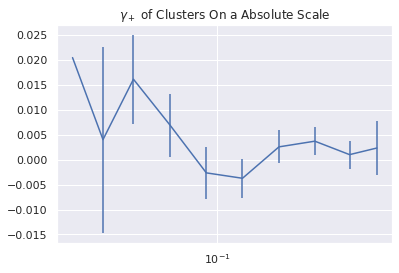

Aggregated xi:
[-2.0512e-02 -9.6745e-01 -1.2552e+01 -9.2751e+00  6.0561e+00  1.5018e+01
 -1.5189e+01 -2.8688e+01 -8.0342e+00 -4.6841e+00]
------------------------------------------------------------------------------
Aggregated meanlogr:
[-4.1936e+00 -9.0699e+02 -2.6353e+03 -3.9039e+03 -5.6254e+03 -7.9560e+03
 -8.7343e+03 -7.8417e+03 -4.3980e+03 -4.1125e+02]
------------------------------------------------------------------------------
Aggregated npairs:
[1.000e+00 2.390e+02 7.760e+02 1.339e+03 2.304e+03 4.043e+03 5.860e+03
 7.683e+03 7.778e+03 1.981e+03]
------------------------------------------------------------------------------
Mean xi:
[-0.0205 -0.004  -0.0162 -0.0069  0.0026  0.0037 -0.0026 -0.0037 -0.001
 -0.0024]
------------------------------------------------------------------------------
Mean meanlogr:
[-4.1936 -3.7949 -3.396  -2.9155 -2.4416 -1.9678 -1.4905 -1.0207 -0.5654
 -0.2076]
------------------------------------------------------------------------------


In [20]:
plt_w_error(mean_abs[1],-mean_abs[0],sig_abs,r"$\gamma_+$ of Clusters On a Absolute Scale ")
print_data(sum_abs,mean_abs)

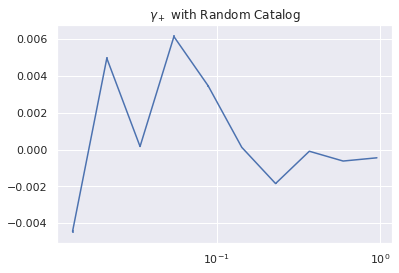

[-4.4456e-03  4.9577e-03  1.6617e-04  6.1347e-03  3.4647e-03  1.2124e-04
 -1.8462e-03 -9.1859e-05 -6.2345e-04 -4.4764e-04]
[ 6.4598e-05 -7.2041e-05 -2.4146e-06 -8.9143e-05 -5.0345e-05 -1.7618e-06
  2.6826e-05  1.3348e-06  9.0593e-06  6.5046e-06]


In [21]:
plt_w_error(r_meanlogr,-r_xi,r_sigma,r"$\gamma_+$ with Random Catalog")
print(-r_xi)
print(r_sigma)

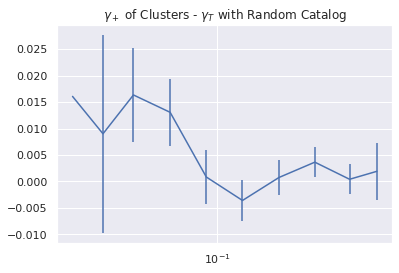

In [22]:
plt_w_error(mean_abs[1],-(mean_abs[0]+r_xi),np.hypot(r_sigma,sig_abs),r"$\gamma_+$ of Clusters - $\gamma_T$ with Random Catalog")

# Rel plots

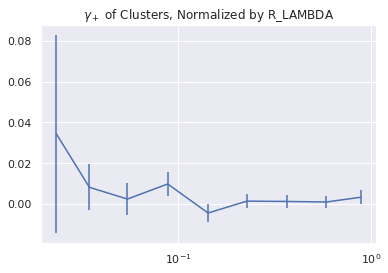

Aggregated xi:
[  0.      -1.4482  -4.4347  -2.6319 -17.6837  13.1299  -7.7366  -9.8146
  -9.6346 -18.0819]
------------------------------------------------------------------------------
Aggregated meanlogr:
[    0.      -157.7881 -1794.9566 -2968.7278 -4317.5704 -6032.252
 -7311.345  -7010.9465 -4454.0303  -646.4456]
------------------------------------------------------------------------------
Aggregated npairs:
[   0.   42.  534. 1021. 1779. 3101. 4937. 6981. 8377. 5232.]
------------------------------------------------------------------------------
Mean xi:
[    nan -0.0345 -0.0083 -0.0026 -0.0099  0.0042 -0.0016 -0.0014 -0.0012
 -0.0035]
------------------------------------------------------------------------------
Mean meanlogr:
[    nan -3.7569 -3.3613 -2.9077 -2.427  -1.9453 -1.4809 -1.0043 -0.5317
 -0.1236]
------------------------------------------------------------------------------


<Figure size 432x288 with 0 Axes>

In [23]:
plt_w_error(mean_rel[1],-mean_rel[0],sig_rel,r"$\gamma_+$ of Clusters, Normalized by R_LAMBDA")
print_data(sum_rel,mean_rel)